# STEP 1: IMPORTING DATA

In [0]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
import time

In [0]:
# import dataset & convert to a dataframe
URL_dataset = "https://drive.google.com/uc?export=download&id=1fw2b-og7KjLSwkXKZ3rPV2P7L_7-OyfY"

# URL of the Google Drive folder of all the dataset used in this problem
# LINK --> 'https://drive.google.com/drive/folders/1p-N2O2Ck3dx83qxn4fqKxgD7l5SAjM-G'

# convert CSV to dataframe
dataset = pd.read_csv(URL_dataset) # appdata10.csv

# STEP 2: DATA CLEANING & EXPLORATORY DATA ANALYSIS (EDA)

In [177]:
# EDA #
dataset.head() # show first 10 results

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [178]:
# Distribution Metrics
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
# Data cleaning #
dataset['hour'] = dataset.hour.str.slice(1,3).astype(int)

In [180]:
## Plotting
# drop somes columns
dataset2 = dataset.copy()
dataset2 = dataset2.drop(columns = ['user','screen_list','enrolled_date','enrolled','first_open'])
# show results
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


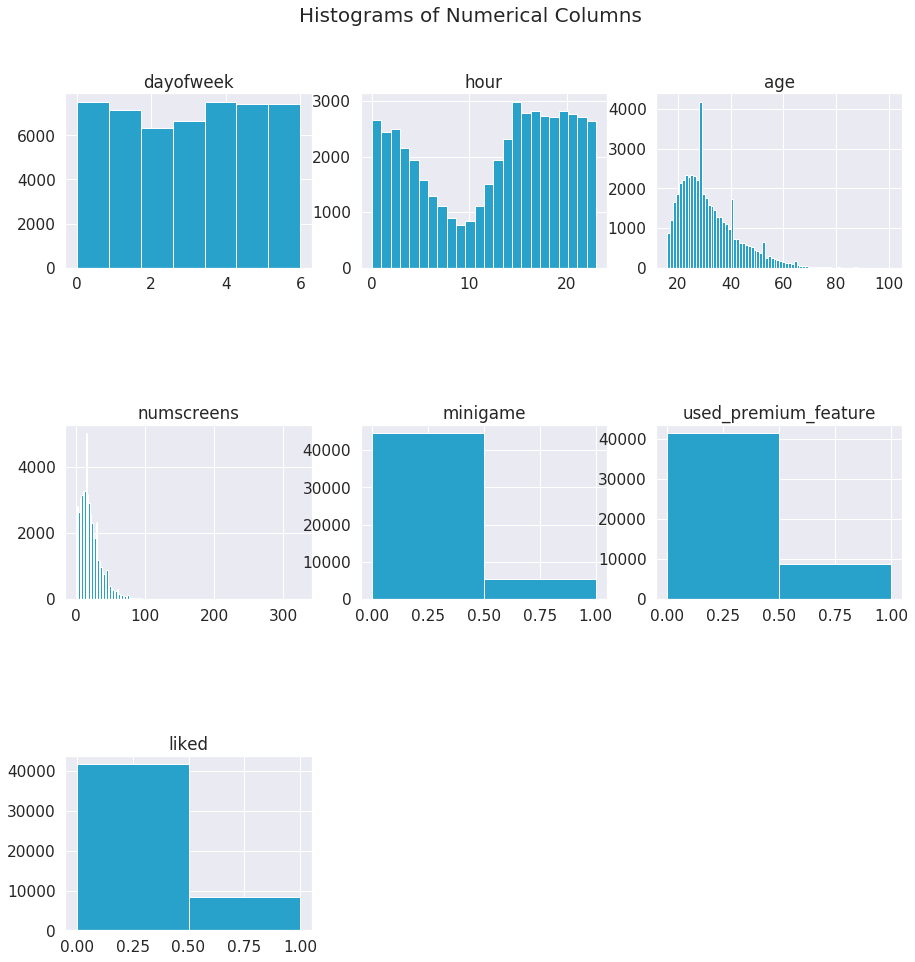

In [181]:
#Histograms
plt.figure(figsize=(15,15))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
# Create a new subfigure for each feature
for i in range(1, dataset2.shape[1] + 1):
  plt.subplot(3,3, i)
  plt.subplots_adjust()
  f = plt.gca() #new figure with default axis
  
  # setting subtitle of Figure
  f.set_title(dataset2.columns.values[i-1])
  
  # calculate the total unique values
  vals = np.size(dataset2.iloc[:, i -1].unique())
  
  # Create new plot
  plt.hist(dataset2.iloc[:, i - 1], bins = vals, color = "#29A2CB")
  plt.subplots_adjust(hspace=0.9, top = 0.9)
  
  


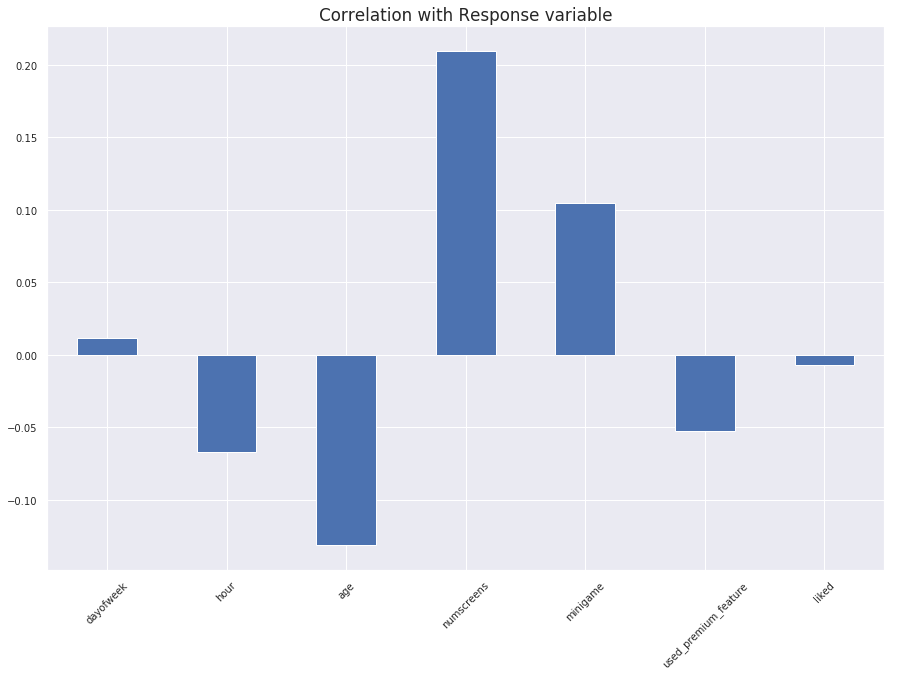

In [182]:
# Correlation with Response
dataset2.corrwith(dataset.enrolled).plot.bar(figsize = (15,10),
                                           title = 'Correlation with Response variable', 
                                           fontsize=10,
                                           rot=45,
                                           grid = True)

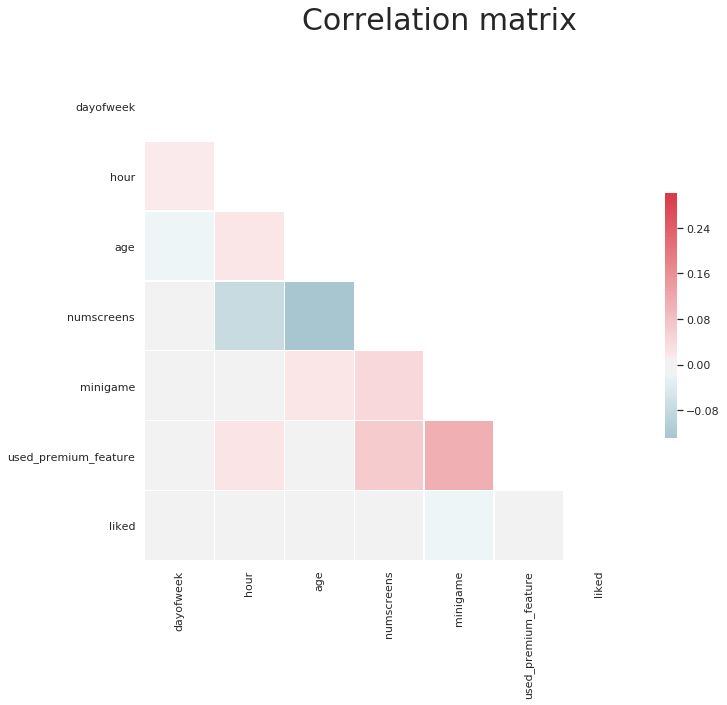

In [183]:
# Correlation Matrix
# Goes to the seaborn ducumentation --> Link: https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="white")

#Compute the correlation matrix
corr = dataset2.corr()

#Generate a mask for the upper triangle
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
f.suptitle("Correlation matrix", fontsize = 30)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# STEP 3: FEATURE ENGINEERING



In [184]:
# Feature Engineering
dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int64
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [185]:
dataset["first_open"] = pd.to_datetime(dataset["first_open"])
#dataset.dtypes
#dataset["first_open"] = [parser.parse(row_data) for row_data in dataset["first_open"]]
dataset["enrolled_date"] = [parser.parse(row_data) if isinstance(row_data,str) else row_data for row_data in dataset["enrolled_date"]]
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [186]:
# Calculate the difference between first_open & enrolled_date. Cast the calculation to timedelta hour
dataset["difference"] = (dataset.enrolled_date - dataset.first_open).astype('timedelta64[h]')
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
difference                     float64
dtype: object

In [187]:
column_difference = dataset["difference"].dropna()
column_difference.shape[0]

31074

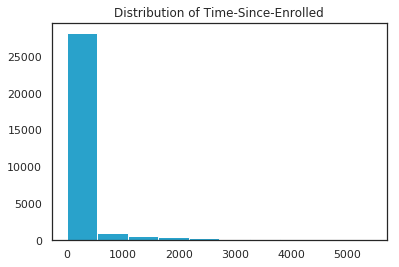

In [188]:
# plot the difference to see the distribution
plt.hist(column_difference, color = '#29A2CB')
plt.title('Distribution of Time-Since-Enrolled')
#plt.figure(figsize=(20,20))
plt.show()

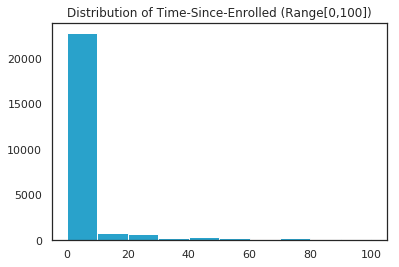

In [189]:
plt.hist(column_difference, color = '#29A2CB', range = [0,100])
plt.title('Distribution of Time-Since-Enrolled (Range[0,100])')
plt.show()

In [190]:
# We realized that most of the people who Subscribe to the App do it in the next 50 hours of testing the app
# so we decided to just simple set the enrolled to zero if the difference is greater than 48 
dataset.loc[dataset.difference > 48, 'enrolled'] = 0
dataset = dataset.drop(columns =['difference','enrolled_date','first_open'])
dataset.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1


In [0]:
### Featuring engineer

In [192]:
## Formating the screen_list Fields 

# import top_screen & convert to a dataframe
URL_top_screen = "https://drive.google.com/uc?export=download&id=1jUJiR3_EIajJzguXDAnXd07Glq08zuKb"

# URL of the Google Drive folder of all the dataset used in this problem
# LINK --> 'https://drive.google.com/drive/folders/1p-N2O2Ck3dx83qxn4fqKxgD7l5SAjM-G'

# convert CSV to dataframe and get all the values of top_screens column
top_screens = pd.read_csv(URL_top_screen).top_screens.values # top_screen.csv
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [0]:
# create list aff actual screen list by user on the dataset
dataset["screen_list"] = dataset.screen_list.astype(str) + ','

In [0]:
# loop over the dataset and try to math the top_screen list with the screen_list of each user (record)
for sc in top_screens:
  # for each word on the top_screen we create a column inside the dataset
  # If the word is containt in the screen_list we mark as True (1) or False (0)
  dataset[sc] = dataset.screen_list.str.contains(sc).astype('int')
  # remove from the list screen_list the actual word. We already check 
  dataset["screen_list"] = dataset.screen_list.str.replace(sc+',', "")

In [0]:
# create a new column of all not top_screen (count)
dataset["Other"] = dataset.screen_list.str.count(",")

# Drop columns we dont need anymore
dataset = dataset.drop(columns = ["screen_list"])

In [196]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,Other
0,235136,3,2,23,15,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,10


In [0]:
# Saving Screen Funnels - We have cases that have similar naming convension. 
# So to avoid the correlation we find them, sumarize and finally get rid of all the columns 
savings_screens = ["Saving1",
                  "Saving2",
                  "Saving2Amount",
                  "Saving4",
                  "Saving5",
                  "Saving6",
                  "Saving7",
                  "Saving8",
                  "Saving9",
                  "Saving10"]

# sum all the related saving screen
dataset["SavingsCount"] = dataset[savings_screens].sum(axis = 1)
dataset = dataset.drop(columns = savings_screens)


In [0]:
# Credit Funnels - The same as Saving Screen
cm_screens = ["Credit1",
              "Credit2",
              "Credit3",
             "Credit3Container",
             "Credit3Dashboard"]

# sum all the related saving screen
dataset["CMCount"] = dataset[cm_screens].sum(axis = 1)
dataset = dataset.drop(columns = cm_screens)

In [0]:
# CC Funnels - The same as Saving Screen
cc_screens = ["CC1",
              "CC1Category",
             "CC3"]

# sum all the related saving screen
dataset["CCCount"] = dataset[cc_screens].sum(axis = 1)
dataset = dataset.drop(columns = cc_screens)

In [0]:
# Loan Funnels - The same as Saving Screen
loan_screens = ["Loan",
              "Loan2",
              "Loan3",
              "Loan4"]

# sum all the related saving screen
dataset["LoansCount"] = dataset[loan_screens].sum(axis = 1)
dataset = dataset.drop(columns = loan_screens)

In [201]:
# shows dataset
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [0]:
# export data to a new CSV
# dataset.to_csv(new_appdata10.csv,index = False)

# STEP 4: DATA PRE-PROCESSING

In [0]:
# data preprocessing
responde = dataset["enrolled"] 
dataset = dataset.drop(columns = 'enrolled')

In [0]:
# create training & testing dataset (80 / 20)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(dataset, responde,
                                                 test_size = 0.2,
                                                 random_state = 0)

In [205]:
# remove the user identifier from the training and testing test
train_identifier = X_train['user']
X_train = X_train.drop(columns = 'user')
test_identifier = X_test['user']
X_test = X_test.drop(columns = 'user')

#shows result
X_train.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,CMCount,CCCount,LoansCount
20330,2,20,32,5,0,1,1,0,0,0,...,0,0,0,0,0,2,0,0,0,2
17532,1,21,22,42,1,0,0,1,1,1,...,0,0,0,0,0,13,0,1,0,1
45819,0,4,26,85,1,0,0,0,1,0,...,0,0,0,0,0,10,0,2,1,2
34807,4,13,25,24,1,0,0,1,0,0,...,0,0,0,0,0,10,0,0,0,1
31888,3,16,50,11,0,0,0,1,0,1,...,0,0,0,0,0,3,0,2,0,0


In [206]:
# preprocessing data. For this purpose we use StandarScaler from sklearn
# --> This fuctionStandardize features by removing the mean and scaling to unit variance
# Link: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
# ScandarScaler return a numpy array without name columns & Index so we need to recreate the dataframe
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.fit_transform(X_test))
# add columns name and Index to the new X_train & X_test 
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values

# Re-asign temp dataset
X_train = X_train2
X_test = X_test2

#show result
X_train.head()


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,CMCount,CCCount,LoansCount
20330,-0.504961,1.000837,0.025525,-1.026726,-0.346830,2.186018,2.246319,-1.039218,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-1.147303,-0.260877,-0.763372,-0.289185,1.785389
17532,-0.997389,1.135280,-0.898034,1.328829,2.883254,-0.457453,-0.445173,0.962262,1.550753,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.839740,-0.260877,0.057524,-0.289185,0.309800
45819,-1.489818,-1.150250,-0.528611,4.066366,2.883254,-0.457453,-0.445173,-1.039218,1.550753,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.025092,-0.260877,0.878421,1.336593,1.785389
34807,0.479896,0.059736,-0.620967,0.182883,2.883254,-0.457453,-0.445173,0.962262,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.025092,-0.260877,-0.763372,-0.289185,0.309800
31888,-0.012532,0.463065,1.687932,-0.644744,-0.346830,-0.457453,-0.445173,0.962262,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-0.875753,-0.260877,0.878421,-0.289185,-1.165789


# STEP 5: MODEL: BUILDING & TRAINING

In [207]:
# Model building
from sklearn.linear_model import LogisticRegression
# LogisticRegression using L1
# --> link: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# To avoid the correlation between the screen we use the l1 regularization
classifier = LogisticRegression(random_state=0, penalty = 'l1')

# train model
classifier.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

#STEP 6: EVALUATING THE MODEL

In [0]:
# import libraries for evaluation result
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [0]:
#  predictions comparizon using the Testing data 
y_predict = classifier.predict(X_test)

In [210]:
## Metrics of evaluation

#General Score
accuracy_score(y_test,y_predict)

0.7679

In [211]:
# The precision is the ratio tp / (tp + fp) where tp is the number of 
# true positives and fp the number of false positives. 
precision_score(y_test,y_predict)

0.760856513908345

In [212]:
# The recall is the ratio tp / (tp + fn) where tp is the number of 
# true positives and fn the number of false negatives.
# How many positive we have en essence 
recall_score(y_test,y_predict)

0.7715097402597403

In [213]:
# f1 
f1_score(y_test,y_predict)

0.7661460957178842

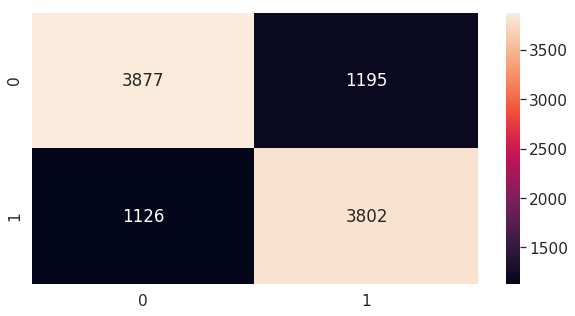

In [220]:
# calculate the confusion matrix in order to evaluate the results
cm = confusion_matrix(y_test, y_predict)

df_cm = pd.DataFrame(cm, index = (0,1), columns = (0,1))
plt.figure(figsize = (10,5))
sns.set(font_scale=1.4)

# heatmap to see positive / negative match
sns.heatmap(df_cm, annot = True, fmt= 'g')

In [215]:
# how accuracy our model learn. We use the cross val score to see if our model
# learn well --> Link: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [216]:
print("Logistic Accuracy %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2 ))

Logistic Accuracy 0.767 (+/- 0.010)


In [0]:
#formatting the Final Results
final_results = pd.concat([y_test, test_identifier], axis = 1).dropna()
final_results["predicted_results"] = y_predict

In [218]:
# shows the result of predicting if a user will Enroll vs Enrolled 
final_results[["user","enrolled","predicted_results"]].reset_index(drop= True).head()

,user,enrolled,predicted_results
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
